## in this project we will use 

* import pandas as pd -- To import Pandas library
* pd.read_csv - To import the CSV file in Jupyter notebook
* df.count() - It counts the no. of non-null values of each column.
* df.isnull().sum() - It detects the missing values from the dataframe.
* import seaborn as sns - To import the Seaborn library.
* import matplotlib.pyplot as plt - To import the Matplotlib library.
* sns.heatmap(df.isnull()) - It will show the all columns & missing values in them in heat map form.
* plt.show() - To show the plot.
* df.groupby(‘Col_name’) - To form groups of all unique values of the column.
* df.sort_values(by= ['Col_name'] ) - Sort the entire dataframe by the values of the given column.     
* df[df.Col_1 = = ‘Element1’] - Filtering – We are accessing all records with Element1 only of Col_1

In [12]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
sns.set_theme(context = 'poster' , style = 'ticks' , palette = 'plasma' , font_scale = 0.7 , rc = {'figure.figsize':[20 , 8]})

In [2]:
df = pd.read_csv('covid_19_data.csv')
df

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7
...,...,...,...,...,...,...
316,4/29/2020,Wyoming,US,545,7,0
317,4/29/2020,Xinjiang,Mainland China,76,3,73
318,4/29/2020,Yukon,Canada,11,0,0
319,4/29/2020,Yunnan,Mainland China,185,2,181


In [3]:
df.count()

Date         321
State        140
Region       321
Confirmed    321
Deaths       321
Recovered    321
dtype: int64

In [4]:
df.isnull().sum()

Date           0
State        181
Region         0
Confirmed      0
Deaths         0
Recovered      0
dtype: int64

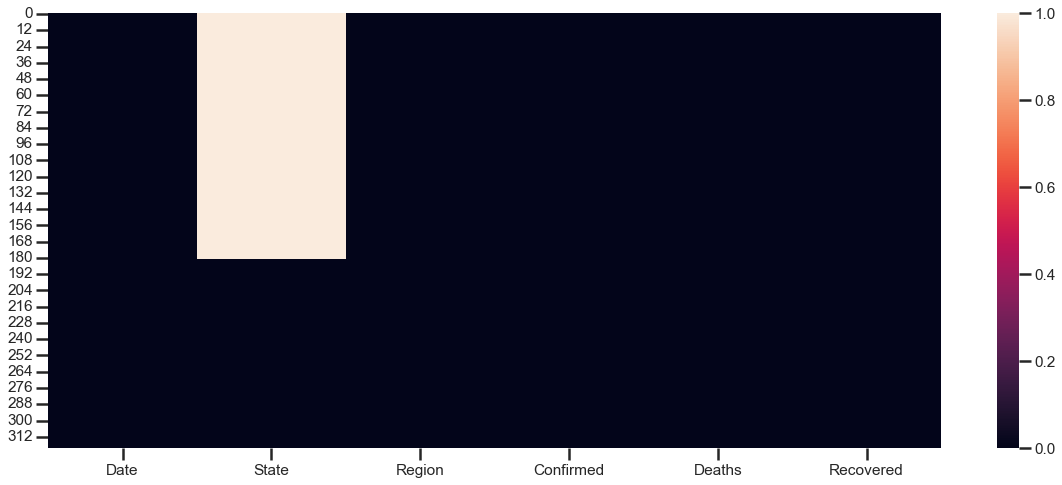

In [13]:
sns.heatmap(df.isnull())
plt.show()

### Q. 1) Show the number of Confirmed, Deaths and Recovered cases in each Region.

In [16]:
x = df.groupby('Region')['Confirmed'].sum().sort_values(ascending = False)
x

Region
US                       1039909
Spain                     236899
Italy                     203591
France                    166543
UK                        166441
                          ...   
Sao Tome and Principe          8
Papua New Guinea               8
Bhutan                         7
Western Sahara                 6
Yemen                          6
Name: Confirmed, Length: 187, dtype: int64

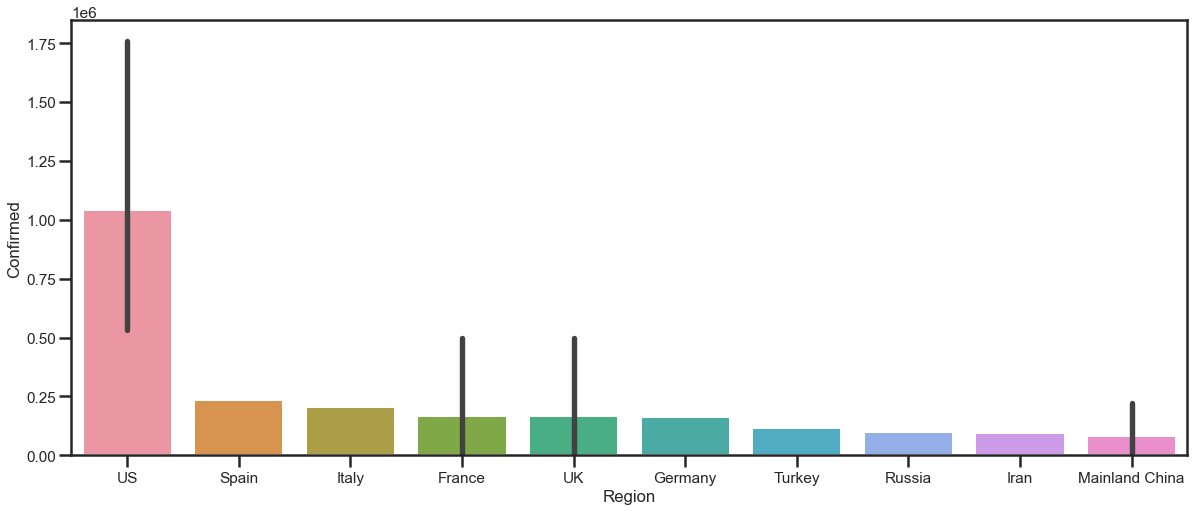

In [18]:
y = sns.barplot(data=df[df['Region'].isin(x.head(10).index)], x = 'Region', y = 'Confirmed',order = x.head(10).index,estimator=sum)

### Q. 2) Remove all the records where the Confirmed Cases is Less Than 10.

In [21]:
less_than_10 = df[df['Confirmed']<10]
less_than_10.shape[0]

17

In [26]:
df.drop(less_than_10.index,axis=0) # didnt use inplace = True becaus am just giving example of deleting without actual deleting it.

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7
...,...,...,...,...,...,...
316,4/29/2020,Wyoming,US,545,7,0
317,4/29/2020,Xinjiang,Mainland China,76,3,73
318,4/29/2020,Yukon,Canada,11,0,0
319,4/29/2020,Yunnan,Mainland China,185,2,181


In [25]:
data = df[~(df.Confirmed < 10)] # to store the data without unwanted rows
data 

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7
...,...,...,...,...,...,...
316,4/29/2020,Wyoming,US,545,7,0
317,4/29/2020,Xinjiang,Mainland China,76,3,73
318,4/29/2020,Yukon,Canada,11,0,0
319,4/29/2020,Yunnan,Mainland China,185,2,181


### Q. 3) In which Region, maximum number of Confirmed cases were recorded ?

In [28]:
df.groupby('Region')['Confirmed'].sum().sort_values(ascending = False).head(1)

Region
US    1039909
Name: Confirmed, dtype: int64

### Q. 4) In which Region, minimum number of Deaths cases were recorded ?

In [41]:
df.groupby('Region')['Deaths'].sum().sort_values(ascending = True).head(50) # first 28 countries recorded 0 deaths

Region
Laos                                0
Mongolia                            0
Mozambique                          0
Cambodia                            0
Fiji                                0
Namibia                             0
Nepal                               0
Madagascar                          0
Macau                               0
Papua New Guinea                    0
Rwanda                              0
Saint Kitts and Nevis               0
Bhutan                              0
Dominica                            0
Central African Republic            0
Saint Lucia                         0
Holy See                            0
Sao Tome and Principe               0
Yemen                               0
Western Sahara                      0
Eritrea                             0
Vietnam                             0
Saint Vincent and the Grenadines    0
Timor-Leste                         0
Uganda                              0
Grenada                             0
South

### Q. 5) How many Confirmed, Deaths & Recovered cases were reported from India till 29 April 2020 ?

In [47]:
india = df[df['Region'] == 'India']
india[['Region','Confirmed', 'Deaths', 'Recovered']]

,Region,Confirmed,Deaths,Recovered
74,India,33062,1079,8437


### Q. 6-A ) Sort the entire data wrt No. of Confirmed cases in ascending order.

In [51]:
df.sort_values(by = 'Confirmed').head(50)

,Date,State,Region,Confirmed,Deaths,Recovered
285,4/29/2020,Recovered,US,0,0,120720
284,4/29/2020,Recovered,Canada,0,0,20327
203,4/29/2020,Diamond Princess cruise ship,Canada,0,1,0
305,4/29/2020,Tibet,Mainland China,1,0,1
289,4/29/2020,Saint Pierre and Miquelon,France,1,0,0
184,4/29/2020,Anguilla,UK,3,0,3
192,4/29/2020,"Bonaire, Sint Eustatius and Saba",Netherlands,5,0,0
272,4/29/2020,Northwest Territories,Canada,5,0,0
288,4/29/2020,Saint Barthelemy,France,6,0,6
178,4/29/2020,NaN,Yemen,6,0,1


### Q. 6-B ) Sort the entire data wrt No. of Recovered cases in descending order.

In [52]:
df.sort_values(by = 'Recovered',ascending = False).head(50)

,Date,State,Region,Confirmed,Deaths,Recovered
153,4/29/2020,NaN,Spain,236899,24275,132929
285,4/29/2020,Recovered,US,0,0,120720
61,4/29/2020,NaN,Germany,161539,6467,120400
76,4/29/2020,NaN,Iran,93657,5957,73791
80,4/29/2020,NaN,Italy,203591,27682,71252
229,4/29/2020,Hubei,Mainland China,68128,4512,63616
57,4/29/2020,NaN,France,165093,24087,48228
167,4/29/2020,NaN,Turkey,117589,3081,44040
22,4/29/2020,NaN,Brazil,79685,5513,34132
158,4/29/2020,NaN,Switzerland,29407,1716,22600


### By Anas Awad